In [21]:
! gdown 1qgd2F5CxXJ27u0F-Tix96uWlBSNK7GcJ

^C


In [1]:
import sys
print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['E:\\SimilarityCal', 'E:/SimilarityCal'])

import pickle
import torch
with open("repo_info_train_embeddings.pkl", "rb") as f:
    data = pickle.load(f)
    # length 315
repo_name = list(data.keys())

print(torch.__version__)
repo_name

Python 3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)] on win32
2.0.1+cu118


['jet-admin/jet-bridge',
 'patrys/httmock',
 'pytransitions/transitions',
 'keleshev/schema',
 'dylanaraps/pywal',
 'PyCQA/modernize',
 'jaraco/path.py',
 'xonsh/xonsh',
 'python-excel/xlrd',
 'cloudnativelabs/kube-shell',
 'ironmussa/Optimus',
 'jazzband/django-taggit',
 'moggers87/salmon',
 'glamp/bashplotlib',
 'PyCQA/prospector',
 'twisted/treq',
 'bbangert/beaker',
 'pypa/bandersnatch',
 'zachwill/moment',
 'encode/apistar',
 'pyinvoke/invoke',
 'skorokithakis/shortuuid',
 's3tools/s3cmd',
 'pyenv/pyenv',
 'stchris/untangle',
 'nvdv/vprof',
 'h2oai/h2o-3',
 'benhamner/Metrics',
 'jmcarp/robobrowser',
 'WiserTogether/django-remote-forms',
 'mahmoud/boltons',
 'stanfordnlp/stanza',
 'keon/algorithms',
 'esnme/ultrajson',
 'boto/boto3',
 'geopy/geopy',
 'sdispater/pendulum',
 'omab/python-social-auth',
 'django-guardian/django-guardian',
 'mongodb/motor',
 'napalm-automation/napalm',
 'django-crispy-forms/django-crispy-forms',
 'mymarilyn/clickhouse-driver',
 'sdispater/orator',
 'co

In [2]:
embedding_models = {'codes_embeddings': 'Lazyhope/unixcoder-nine-advtest',
 'docs_embeddings': 'Lazyhope/unixcoder-nine-advtest',
 'structure_embeddings': 'sentence-transformers/bert-base-nli-mean-tokens',
 'requirements_embeddings': 'Lazyhope/unixcoder-nine-advtest',
 'readme_embeddings': 'microsoft/unixcoder-base-unimodal'}
embedding_models

{'codes_embeddings': 'Lazyhope/unixcoder-nine-advtest',
 'docs_embeddings': 'Lazyhope/unixcoder-nine-advtest',
 'structure_embeddings': 'sentence-transformers/bert-base-nli-mean-tokens',
 'requirements_embeddings': 'Lazyhope/unixcoder-nine-advtest',
 'readme_embeddings': 'microsoft/unixcoder-base-unimodal'}

In [3]:
models = list(data[repo_name[0]]['structure_embeddings'].keys())
models

['sentence-transformers/all-mpnet-base-v2',
 'sentence-transformers/multi-qa-mpnet-base-cos-v1',
 'sentence-transformers/bert-base-nli-mean-tokens',
 'sentence-transformers/paraphrase-multilingual-mpnet-base-v2',
 'sentence-transformers/all-distilroberta-v1',
 'sentence-transformers/distilbert-base-nli-mean-tokens']

In [4]:
labels = []
codes_embeddings = []
docs_embeddings = []
structure_embeddings = []
requirements_embeddings = []
readme_embeddings = []

embeddings = [codes_embeddings, docs_embeddings, structure_embeddings, requirements_embeddings, readme_embeddings]
tasks = list(embedding_models.keys())

for repo in repo_name:
    labels.append(data[repo]['topic'])
    for i, embedding in enumerate(embeddings):
        key = tasks[i]
        try:
            embedding.append(data[repo][key][embedding_models[key]])
        except:
            embedding.append(data[repo][key])

len(set(labels))

120

In [5]:
docs_embeddings[0].shape

torch.Size([768])

In [6]:
from torch.utils.data import Dataset


class EmbeddingDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(labels)

    def __getitem__(self, index):
        return self.data[index], self.labels[index]

In [60]:
from torch import nn


class MLP(nn.Module):
    # for docs_embeddings, codes_embeddings
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(768, 384),
            nn.ReLU(),
            nn.Linear(384, 120)
        )

    def forward(self, data):
        res = self.net(data)
        return res

codes_embeddings
Training starting
Epoch: 1, train loss: 1.069, test loss: 0.717, train acc: 0.108, test acc: 0.267
118.4 examples/sec on cuda total training time:2.7 sec
Epoch: 2, train loss: 0.769, test loss: 0.546, train acc: 0.225, test acc: 0.425
5421.6 examples/sec on cuda total training time:2.7 sec
Epoch: 3, train loss: 0.624, test loss: 0.497, train acc: 0.346, test acc: 0.463
5555.7 examples/sec on cuda total training time:2.8 sec
Epoch: 4, train loss: 0.570, test loss: 0.388, train acc: 0.400, test acc: 0.524
4667.0 examples/sec on cuda total training time:2.8 sec
Epoch: 5, train loss: 0.485, test loss: 0.424, train acc: 0.479, test acc: 0.556
5195.7 examples/sec on cuda total training time:2.9 sec
Epoch: 6, train loss: 0.477, test loss: 0.374, train acc: 0.438, test acc: 0.552
5515.5 examples/sec on cuda total training time:3.0 sec
Epoch: 7, train loss: 0.453, test loss: 0.323, train acc: 0.473, test acc: 0.613
5421.2 examples/sec on cuda total training time:3.0 sec
Epoch: 

Epoch: 61, train loss: 0.060, test loss: 0.039, train acc: 0.937, test acc: 0.975
5544.5 examples/sec on cuda total training time:6.2 sec
Epoch: 62, train loss: 0.071, test loss: 0.123, train acc: 0.908, test acc: 0.870
5178.5 examples/sec on cuda total training time:6.3 sec
Epoch: 63, train loss: 0.155, test loss: 0.087, train acc: 0.778, test acc: 0.889
5095.0 examples/sec on cuda total training time:6.3 sec
Epoch: 64, train loss: 0.119, test loss: 0.121, train acc: 0.838, test acc: 0.835
5518.5 examples/sec on cuda total training time:6.4 sec
Epoch: 65, train loss: 0.141, test loss: 0.071, train acc: 0.790, test acc: 0.908
5518.1 examples/sec on cuda total training time:6.5 sec
Epoch: 66, train loss: 0.160, test loss: 0.096, train acc: 0.787, test acc: 0.867
5657.4 examples/sec on cuda total training time:6.5 sec
Epoch: 67, train loss: 0.177, test loss: 0.139, train acc: 0.771, test acc: 0.857
5098.0 examples/sec on cuda total training time:6.6 sec
Epoch: 68, train loss: 0.161, test

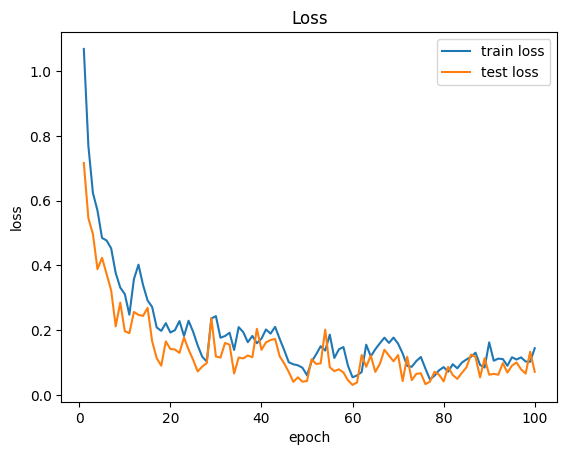

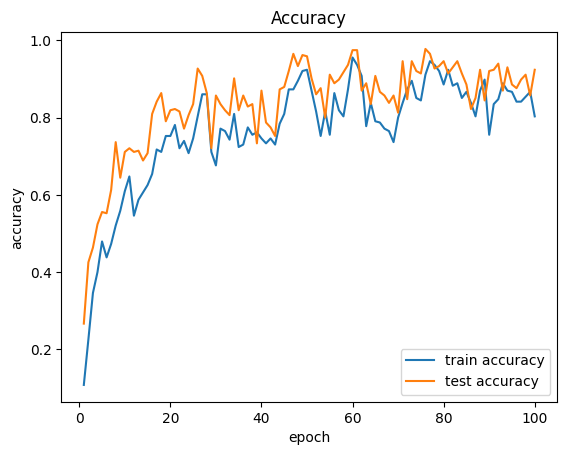

------------------------------
docs_embeddings
Training starting
Epoch: 1, train loss: 1.095, test loss: 0.625, train acc: 0.102, test acc: 0.346
3727.5 examples/sec on cuda total training time:0.1 sec
Epoch: 2, train loss: 0.779, test loss: 0.564, train acc: 0.235, test acc: 0.467
4038.4 examples/sec on cuda total training time:0.2 sec
Epoch: 3, train loss: 0.728, test loss: 0.460, train acc: 0.321, test acc: 0.511
3973.2 examples/sec on cuda total training time:0.2 sec
Epoch: 4, train loss: 0.616, test loss: 0.407, train acc: 0.394, test acc: 0.603
4145.3 examples/sec on cuda total training time:0.3 sec
Epoch: 5, train loss: 0.560, test loss: 0.320, train acc: 0.473, test acc: 0.638
5528.5 examples/sec on cuda total training time:0.4 sec
Epoch: 6, train loss: 0.469, test loss: 0.372, train acc: 0.505, test acc: 0.644
5463.7 examples/sec on cuda total training time:0.4 sec
Epoch: 7, train loss: 0.458, test loss: 0.295, train acc: 0.521, test acc: 0.667
5456.7 examples/sec on cuda tota

Epoch: 61, train loss: 0.121, test loss: 0.114, train acc: 0.860, test acc: 0.886
4847.0 examples/sec on cuda total training time:3.6 sec
Epoch: 62, train loss: 0.117, test loss: 0.087, train acc: 0.857, test acc: 0.908
5201.5 examples/sec on cuda total training time:3.6 sec
Epoch: 63, train loss: 0.080, test loss: 0.061, train acc: 0.914, test acc: 0.949
5760.7 examples/sec on cuda total training time:3.7 sec
Epoch: 64, train loss: 0.072, test loss: 0.060, train acc: 0.937, test acc: 0.946
5631.7 examples/sec on cuda total training time:3.7 sec
Epoch: 65, train loss: 0.080, test loss: 0.112, train acc: 0.917, test acc: 0.895
5257.4 examples/sec on cuda total training time:3.8 sec
Epoch: 66, train loss: 0.126, test loss: 0.082, train acc: 0.860, test acc: 0.921
5164.8 examples/sec on cuda total training time:3.9 sec
Epoch: 67, train loss: 0.113, test loss: 0.083, train acc: 0.870, test acc: 0.898
5154.7 examples/sec on cuda total training time:3.9 sec
Epoch: 68, train loss: 0.132, test

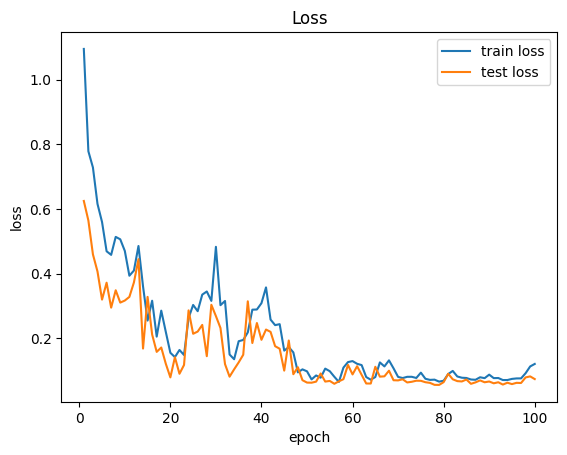

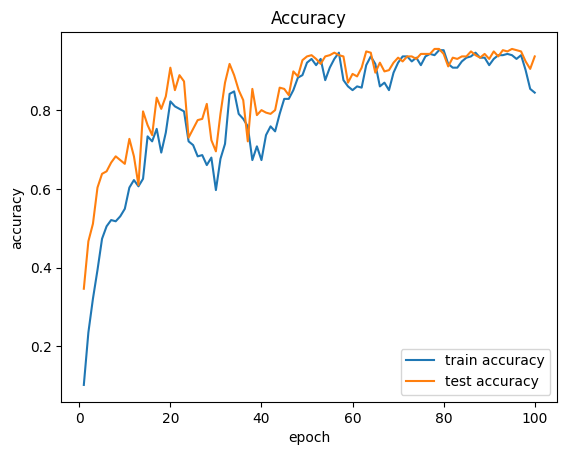

------------------------------
structure_embeddings
Training starting
Epoch: 1, train loss: 1.145, test loss: 0.949, train acc: 0.006, test acc: 0.019
5381.7 examples/sec on cuda total training time:0.1 sec
Epoch: 2, train loss: 0.976, test loss: 0.964, train acc: 0.022, test acc: 0.019
5371.2 examples/sec on cuda total training time:0.1 sec
Epoch: 3, train loss: 0.968, test loss: 0.991, train acc: 0.013, test acc: 0.019
5543.2 examples/sec on cuda total training time:0.2 sec
Epoch: 4, train loss: 0.968, test loss: 0.941, train acc: 0.016, test acc: 0.029
5086.4 examples/sec on cuda total training time:0.2 sec
Epoch: 5, train loss: 0.960, test loss: 1.054, train acc: 0.016, test acc: 0.025
5432.7 examples/sec on cuda total training time:0.3 sec
Epoch: 6, train loss: 0.956, test loss: 0.936, train acc: 0.019, test acc: 0.025
5282.8 examples/sec on cuda total training time:0.4 sec
Epoch: 7, train loss: 0.953, test loss: 0.936, train acc: 0.022, test acc: 0.032
5282.6 examples/sec on cuda

Epoch: 60, train loss: 0.936, test loss: 0.930, train acc: 0.025, test acc: 0.025
5081.2 examples/sec on cuda total training time:3.5 sec
Epoch: 61, train loss: 0.933, test loss: 0.933, train acc: 0.025, test acc: 0.022
5115.2 examples/sec on cuda total training time:3.6 sec
Epoch: 62, train loss: 0.933, test loss: 0.930, train acc: 0.022, test acc: 0.025
4957.0 examples/sec on cuda total training time:3.7 sec
Epoch: 63, train loss: 0.933, test loss: 0.930, train acc: 0.025, test acc: 0.025
5033.5 examples/sec on cuda total training time:3.7 sec
Epoch: 64, train loss: 0.937, test loss: 0.930, train acc: 0.025, test acc: 0.025
5249.4 examples/sec on cuda total training time:3.8 sec
Epoch: 65, train loss: 0.934, test loss: 0.930, train acc: 0.025, test acc: 0.025
4765.7 examples/sec on cuda total training time:3.8 sec
Epoch: 66, train loss: 0.934, test loss: 0.930, train acc: 0.025, test acc: 0.025
5250.0 examples/sec on cuda total training time:3.9 sec
Epoch: 67, train loss: 0.935, test

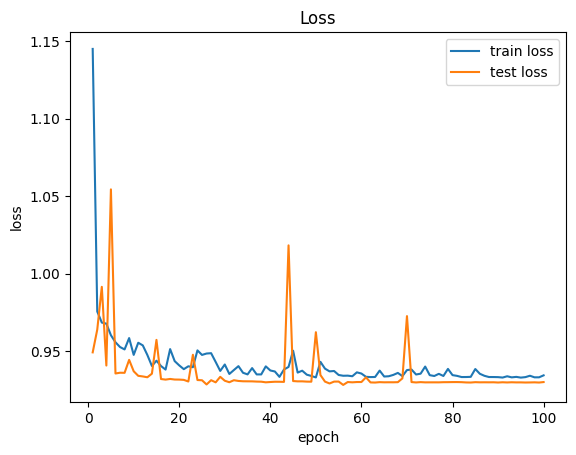

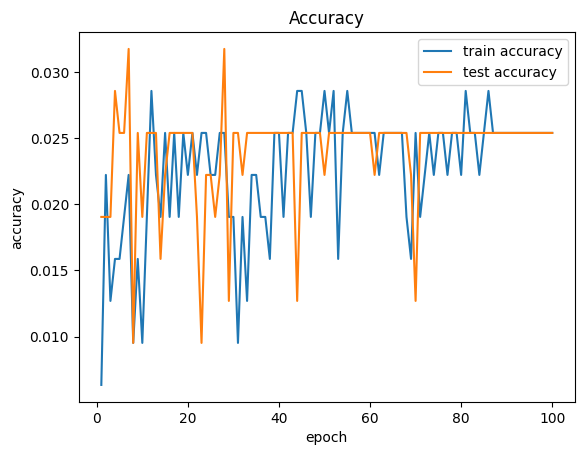

------------------------------
requirements_embeddings
Training starting
Epoch: 1, train loss: 1.604, test loss: 0.951, train acc: 0.003, test acc: 0.019
4200.1 examples/sec on cuda total training time:0.1 sec
Epoch: 2, train loss: 0.958, test loss: 0.945, train acc: 0.013, test acc: 0.022
4210.7 examples/sec on cuda total training time:0.1 sec
Epoch: 3, train loss: 0.951, test loss: 0.942, train acc: 0.019, test acc: 0.019
5440.5 examples/sec on cuda total training time:0.2 sec
Epoch: 4, train loss: 0.947, test loss: 0.939, train acc: 0.006, test acc: 0.022
5852.7 examples/sec on cuda total training time:0.3 sec
Epoch: 5, train loss: 0.954, test loss: 0.937, train acc: 0.032, test acc: 0.022
5846.8 examples/sec on cuda total training time:0.3 sec
Epoch: 6, train loss: 0.950, test loss: 0.936, train acc: 0.022, test acc: 0.022
5334.8 examples/sec on cuda total training time:0.4 sec
Epoch: 7, train loss: 0.940, test loss: 0.995, train acc: 0.019, test acc: 0.022
5931.6 examples/sec on c

Epoch: 60, train loss: 0.937, test loss: 0.930, train acc: 0.022, test acc: 0.025
5542.8 examples/sec on cuda total training time:3.4 sec
Epoch: 61, train loss: 0.934, test loss: 0.930, train acc: 0.025, test acc: 0.025
5420.8 examples/sec on cuda total training time:3.5 sec
Epoch: 62, train loss: 0.934, test loss: 0.930, train acc: 0.022, test acc: 0.025
5625.0 examples/sec on cuda total training time:3.5 sec
Epoch: 63, train loss: 0.933, test loss: 0.930, train acc: 0.025, test acc: 0.025
5381.3 examples/sec on cuda total training time:3.6 sec
Epoch: 64, train loss: 0.934, test loss: 0.930, train acc: 0.025, test acc: 0.025
5443.6 examples/sec on cuda total training time:3.6 sec
Epoch: 65, train loss: 0.934, test loss: 0.930, train acc: 0.025, test acc: 0.025
5744.3 examples/sec on cuda total training time:3.7 sec
Epoch: 66, train loss: 0.935, test loss: 0.950, train acc: 0.019, test acc: 0.025
5328.9 examples/sec on cuda total training time:3.8 sec
Epoch: 67, train loss: 0.938, test

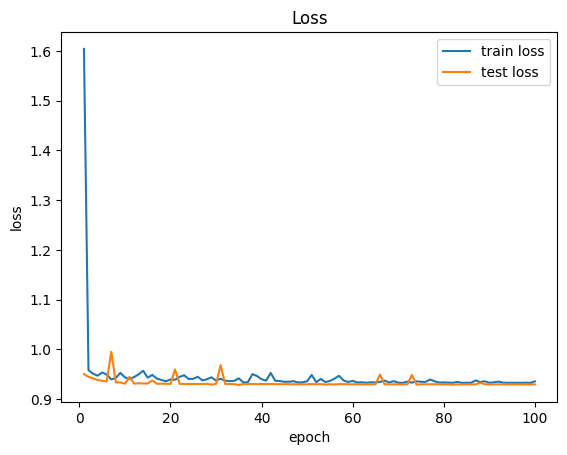

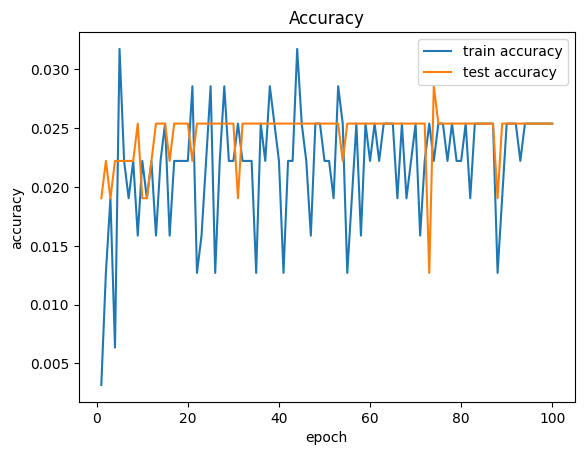

------------------------------
readme_embeddings
Training starting
Epoch: 1, train loss: 1.178, test loss: 0.944, train acc: 0.013, test acc: 0.013
5250.0 examples/sec on cuda total training time:0.1 sec
Epoch: 2, train loss: 0.959, test loss: 0.943, train acc: 0.016, test acc: 0.029
5432.7 examples/sec on cuda total training time:0.1 sec
Epoch: 3, train loss: 0.950, test loss: 0.938, train acc: 0.016, test acc: 0.035
5292.9 examples/sec on cuda total training time:0.2 sec
Epoch: 4, train loss: 0.952, test loss: 0.938, train acc: 0.013, test acc: 0.019
5513.5 examples/sec on cuda total training time:0.2 sec
Epoch: 5, train loss: 0.950, test loss: 0.935, train acc: 0.019, test acc: 0.022
5136.9 examples/sec on cuda total training time:0.3 sec
Epoch: 6, train loss: 0.947, test loss: 0.936, train acc: 0.029, test acc: 0.025
5249.7 examples/sec on cuda total training time:0.4 sec
Epoch: 7, train loss: 0.959, test loss: 0.933, train acc: 0.006, test acc: 0.025
5722.1 examples/sec on cuda to

Epoch: 60, train loss: 0.916, test loss: 0.920, train acc: 0.038, test acc: 0.010
5338.5 examples/sec on cuda total training time:3.4 sec
Epoch: 61, train loss: 0.910, test loss: 0.891, train acc: 0.029, test acc: 0.044
5826.6 examples/sec on cuda total training time:3.5 sec
Epoch: 62, train loss: 0.915, test loss: 0.916, train acc: 0.022, test acc: 0.029
5756.5 examples/sec on cuda total training time:3.5 sec
Epoch: 63, train loss: 0.917, test loss: 0.901, train acc: 0.025, test acc: 0.032
5590.2 examples/sec on cuda total training time:3.6 sec
Epoch: 64, train loss: 0.918, test loss: 0.911, train acc: 0.032, test acc: 0.032
5095.3 examples/sec on cuda total training time:3.6 sec
Epoch: 65, train loss: 0.911, test loss: 0.893, train acc: 0.025, test acc: 0.032
5419.7 examples/sec on cuda total training time:3.7 sec
Epoch: 66, train loss: 0.926, test loss: 0.910, train acc: 0.029, test acc: 0.019
5163.5 examples/sec on cuda total training time:3.8 sec
Epoch: 67, train loss: 0.913, test

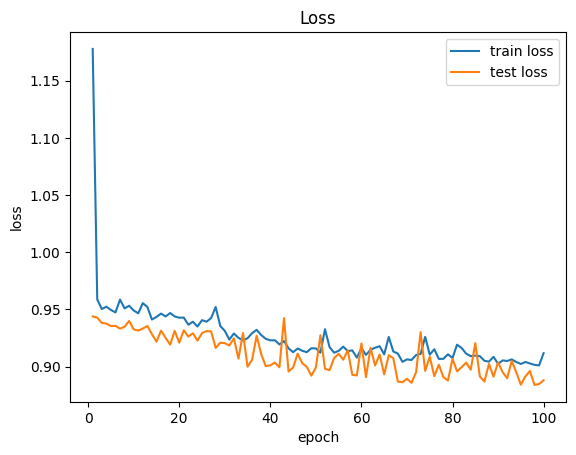

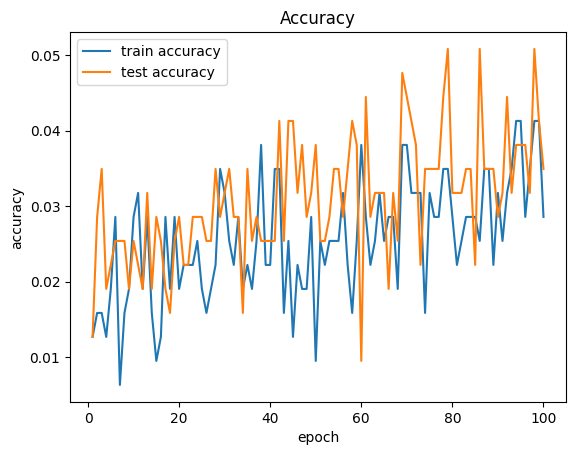

------------------------------


In [21]:
from utils import train_model, drawGraph
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder
import torch


batch_size = 5
epochs = 100
lr = 0.01
weight_decay = 0.01

labels_encoder = LabelEncoder()
encoded_labels = labels_encoder.fit_transform(labels)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for i, embedding in enumerate(embeddings):
    print(tasks[i])
    dataset = EmbeddingDataset(embedding, encoded_labels)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    net = MLP()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=lr, amsgrad=True, weight_decay=weight_decay)
    train_loss, test_loss, train_acc, test_acc = train_model(net, loss_fn, optimizer, epochs, device, train_loader, test_loader)
    drawGraph(train_loss, test_loss, train_acc, test_acc)
    print("-"*30)

In [7]:
from torch import nn


class UnTextMLP(nn.Module):
    # for requirements_embeddings, readme_embeddings
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(768, 120)
        )

    def forward(self, data):
        res = self.net(data)
        return res

structure_embeddings
Training starting
Epoch: 1, train loss: 1.168, test loss: 0.912, train acc: 0.006, test acc: 0.041
2697.3 examples/sec on cuda total training time:0.1 sec
Epoch: 2, train loss: 0.968, test loss: 0.874, train acc: 0.016, test acc: 0.057
3230.3 examples/sec on cuda total training time:0.2 sec
Epoch: 3, train loss: 0.938, test loss: 0.858, train acc: 0.032, test acc: 0.067
4314.8 examples/sec on cuda total training time:0.3 sec
Epoch: 4, train loss: 0.918, test loss: 0.846, train acc: 0.051, test acc: 0.079
5626.9 examples/sec on cuda total training time:0.3 sec
Epoch: 5, train loss: 0.914, test loss: 0.827, train acc: 0.048, test acc: 0.083
5723.1 examples/sec on cuda total training time:0.4 sec
Epoch: 6, train loss: 0.909, test loss: 0.834, train acc: 0.038, test acc: 0.079
5332.9 examples/sec on cuda total training time:0.5 sec
Epoch: 7, train loss: 0.899, test loss: 0.825, train acc: 0.057, test acc: 0.083
5930.1 examples/sec on cuda total training time:0.5 sec
Ep

Epoch: 62, train loss: 0.879, test loss: 0.804, train acc: 0.051, test acc: 0.079
5953.2 examples/sec on cuda total training time:3.3 sec
Epoch: 63, train loss: 0.885, test loss: 0.816, train acc: 0.048, test acc: 0.083
5984.2 examples/sec on cuda total training time:3.4 sec
Epoch: 64, train loss: 0.889, test loss: 0.813, train acc: 0.041, test acc: 0.086
6233.7 examples/sec on cuda total training time:3.4 sec
Epoch: 65, train loss: 0.883, test loss: 0.808, train acc: 0.060, test acc: 0.089
6048.8 examples/sec on cuda total training time:3.5 sec
Epoch: 66, train loss: 0.881, test loss: 0.808, train acc: 0.044, test acc: 0.076
6096.7 examples/sec on cuda total training time:3.5 sec
Epoch: 67, train loss: 0.876, test loss: 0.819, train acc: 0.054, test acc: 0.076
6209.2 examples/sec on cuda total training time:3.6 sec
Epoch: 68, train loss: 0.887, test loss: 0.806, train acc: 0.051, test acc: 0.086
6176.9 examples/sec on cuda total training time:3.6 sec
Epoch: 69, train loss: 0.878, test

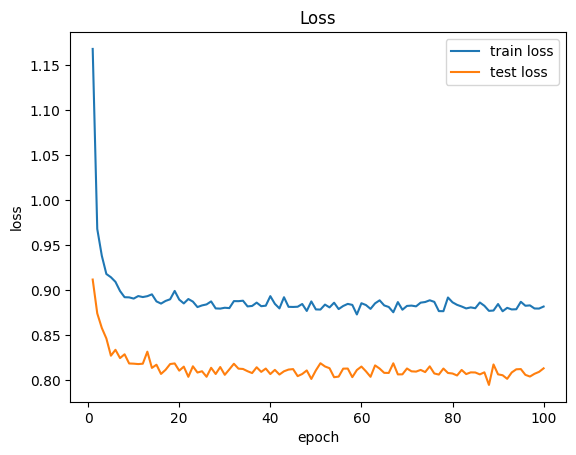

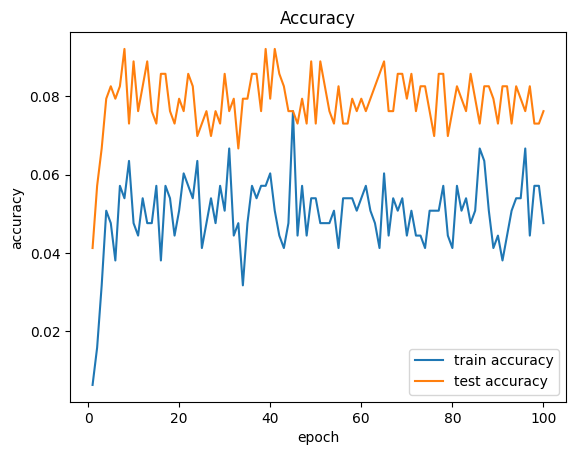

------------------------------
requirements_embeddings
Training starting
Epoch: 1, train loss: 1.357, test loss: 0.930, train acc: 0.010, test acc: 0.044
5316.8 examples/sec on cuda total training time:0.1 sec
Epoch: 2, train loss: 1.005, test loss: 0.880, train acc: 0.016, test acc: 0.048
5718.5 examples/sec on cuda total training time:0.1 sec
Epoch: 3, train loss: 0.954, test loss: 0.832, train acc: 0.041, test acc: 0.098
5705.1 examples/sec on cuda total training time:0.2 sec
Epoch: 4, train loss: 0.899, test loss: 0.800, train acc: 0.070, test acc: 0.102
5163.9 examples/sec on cuda total training time:0.2 sec
Epoch: 5, train loss: 0.864, test loss: 0.790, train acc: 0.079, test acc: 0.137
5036.1 examples/sec on cuda total training time:0.3 sec
Epoch: 6, train loss: 0.830, test loss: 0.744, train acc: 0.095, test acc: 0.187
4838.2 examples/sec on cuda total training time:0.4 sec
Epoch: 7, train loss: 0.822, test loss: 0.696, train acc: 0.108, test acc: 0.178
5494.8 examples/sec on c

Epoch: 60, train loss: 0.387, test loss: 0.317, train acc: 0.527, test acc: 0.616
5080.3 examples/sec on cuda total training time:3.4 sec
Epoch: 61, train loss: 0.360, test loss: 0.300, train acc: 0.562, test acc: 0.644
5446.8 examples/sec on cuda total training time:3.5 sec
Epoch: 62, train loss: 0.363, test loss: 0.320, train acc: 0.559, test acc: 0.600
4782.8 examples/sec on cuda total training time:3.5 sec
Epoch: 63, train loss: 0.378, test loss: 0.337, train acc: 0.533, test acc: 0.559
5446.6 examples/sec on cuda total training time:3.6 sec
Epoch: 64, train loss: 0.379, test loss: 0.308, train acc: 0.514, test acc: 0.610
5240.9 examples/sec on cuda total training time:3.7 sec
Epoch: 65, train loss: 0.358, test loss: 0.306, train acc: 0.571, test acc: 0.616
4845.7 examples/sec on cuda total training time:3.7 sec
Epoch: 66, train loss: 0.358, test loss: 0.290, train acc: 0.559, test acc: 0.663
4924.8 examples/sec on cuda total training time:3.8 sec
Epoch: 67, train loss: 0.343, test

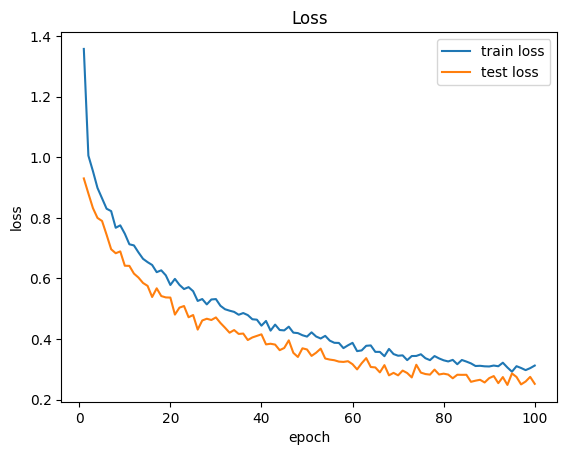

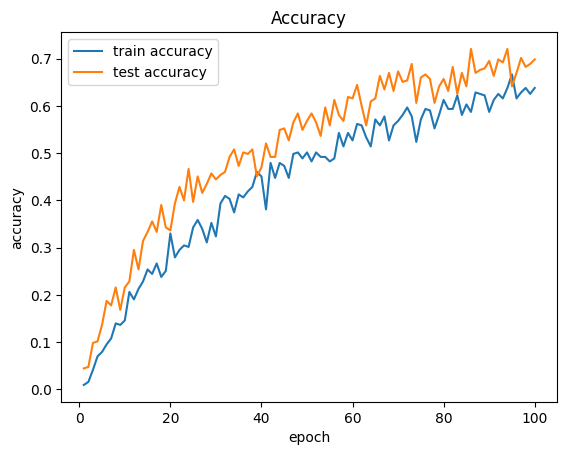

------------------------------
readme_embeddings
Training starting
Epoch: 1, train loss: 1.203, test loss: 0.847, train acc: 0.010, test acc: 0.079
5284.7 examples/sec on cuda total training time:0.1 sec
Epoch: 2, train loss: 0.857, test loss: 0.689, train acc: 0.070, test acc: 0.321
5877.4 examples/sec on cuda total training time:0.1 sec
Epoch: 3, train loss: 0.717, test loss: 0.568, train acc: 0.232, test acc: 0.429
6054.9 examples/sec on cuda total training time:0.2 sec
Epoch: 4, train loss: 0.594, test loss: 0.466, train acc: 0.406, test acc: 0.540
5428.9 examples/sec on cuda total training time:0.2 sec
Epoch: 5, train loss: 0.493, test loss: 0.371, train acc: 0.559, test acc: 0.765
5577.2 examples/sec on cuda total training time:0.3 sec
Epoch: 6, train loss: 0.402, test loss: 0.303, train acc: 0.733, test acc: 0.886
5447.2 examples/sec on cuda total training time:0.3 sec
Epoch: 7, train loss: 0.332, test loss: 0.257, train acc: 0.806, test acc: 0.876
5563.2 examples/sec on cuda to

Epoch: 60, train loss: 0.044, test loss: 0.043, train acc: 0.975, test acc: 0.975
4786.2 examples/sec on cuda total training time:3.4 sec
Epoch: 61, train loss: 0.044, test loss: 0.042, train acc: 0.975, test acc: 0.975
4935.4 examples/sec on cuda total training time:3.5 sec
Epoch: 62, train loss: 0.044, test loss: 0.042, train acc: 0.975, test acc: 0.975
4936.8 examples/sec on cuda total training time:3.5 sec
Epoch: 63, train loss: 0.044, test loss: 0.042, train acc: 0.975, test acc: 0.975
5715.7 examples/sec on cuda total training time:3.6 sec
Epoch: 64, train loss: 0.044, test loss: 0.042, train acc: 0.975, test acc: 0.975
5438.5 examples/sec on cuda total training time:3.7 sec
Epoch: 65, train loss: 0.044, test loss: 0.042, train acc: 0.975, test acc: 0.975
5029.0 examples/sec on cuda total training time:3.7 sec
Epoch: 66, train loss: 0.044, test loss: 0.042, train acc: 0.975, test acc: 0.975
4715.1 examples/sec on cuda total training time:3.8 sec
Epoch: 67, train loss: 0.043, test

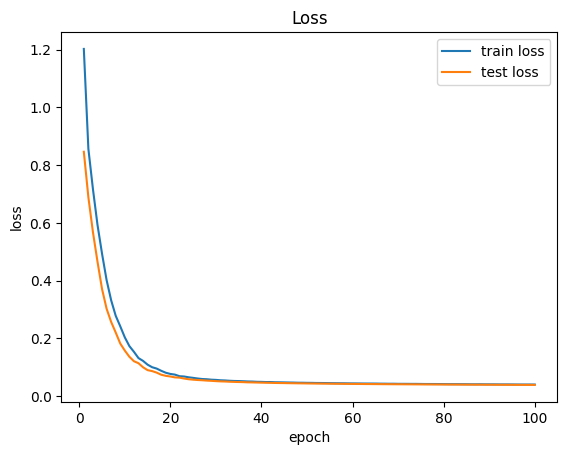

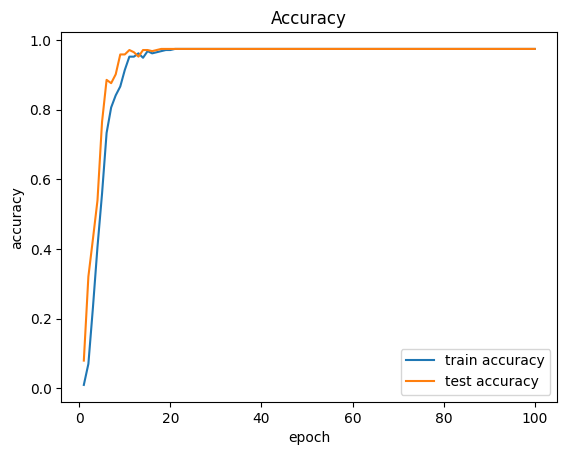

------------------------------


In [23]:
from utils import train_model, drawGraph
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder
import torch


batch_size = 5
epochs = 100
lr = 0.001
weight_decay = 0.001

labels_encoder = LabelEncoder()
encoded_labels = labels_encoder.fit_transform(labels)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for i, embedding in enumerate(embeddings[-3:]):
    print(tasks[i+2])
    dataset = EmbeddingDataset(embedding, encoded_labels)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    net = UnTextMLP()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=lr, amsgrad=True, weight_decay=weight_decay)
    train_loss, test_loss, train_acc, test_acc = train_model(net, loss_fn, optimizer, epochs, device, train_loader, test_loader)
    drawGraph(train_loss, test_loss, train_acc, test_acc)
    print("-"*30)

In [5]:
from torch import nn
from torch.nn import functional as F


class RNNModel(nn.Module):

    def __init__(self, rnn_layer, vocab_size, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size
        self.num_hiddens = self.rnn.hidden_size
        if not self.rnn.bidirectional:
            self.num_directions = 1
            self.linear = nn.Linear(self.num_hiddens, self.vocab_size)
        else:
            self.num_directions = 2
            self.linear = nn.Linear(self.num_hiddens * 2, self.vocab_size)

    def forward(self, inputs, state):
        inputs = inputs.view(1, 5, 768)
        Y, state = self.rnn(inputs, state)
        output = self.linear(Y.reshape((-1, Y.shape[-1])))
        return output, state

    def begin_state(self, device, batch_size=1):
        if not isinstance(self.rnn, nn.LSTM):
            # nn.GRU
            return torch.zeros((self.num_directions * self.rnn.num_layers,
                                batch_size, self.num_hiddens),
                               device=device)
        else:
            # nn.LSTM
            return (torch.zeros((
                self.num_directions * self.rnn.num_layers,
                batch_size, self.num_hiddens), device=device),
                    torch.zeros((
                        self.num_directions * self.rnn.num_layers,
                        batch_size, self.num_hiddens), device=device))


from torch.utils.data import Dataset


class SequenceDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(labels)

    def __getitem__(self, index):
        return self.data[index], self.labels[index]

Training starting
Epoch: 1, train loss: 0.982, test loss: 0.929, train acc: 0.003, test acc: 0.044
484.2 examples/sec on cuda total training time:0.7 sec
Epoch: 2, train loss: 0.943, test loss: 0.915, train acc: 0.029, test acc: 0.063
794.4 examples/sec on cuda total training time:1.0 sec
Epoch: 3, train loss: 0.930, test loss: 0.908, train acc: 0.032, test acc: 0.073
791.2 examples/sec on cuda total training time:1.4 sec
Epoch: 4, train loss: 0.916, test loss: 0.897, train acc: 0.054, test acc: 0.067
809.6 examples/sec on cuda total training time:1.8 sec
Epoch: 5, train loss: 0.906, test loss: 0.885, train acc: 0.057, test acc: 0.070
805.4 examples/sec on cuda total training time:2.2 sec
Epoch: 6, train loss: 0.898, test loss: 0.874, train acc: 0.044, test acc: 0.076
797.5 examples/sec on cuda total training time:2.6 sec
Epoch: 7, train loss: 0.886, test loss: 0.864, train acc: 0.051, test acc: 0.083
803.8 examples/sec on cuda total training time:3.0 sec
Epoch: 8, train loss: 0.878, t

Epoch: 61, train loss: 0.794, test loss: 0.780, train acc: 0.073, test acc: 0.089
779.5 examples/sec on cuda total training time:24.3 sec
Epoch: 62, train loss: 0.797, test loss: 0.780, train acc: 0.073, test acc: 0.092
789.9 examples/sec on cuda total training time:24.6 sec
Epoch: 63, train loss: 0.794, test loss: 0.780, train acc: 0.086, test acc: 0.092
795.7 examples/sec on cuda total training time:25.0 sec
Epoch: 64, train loss: 0.793, test loss: 0.780, train acc: 0.073, test acc: 0.089
792.9 examples/sec on cuda total training time:25.4 sec
Epoch: 65, train loss: 0.794, test loss: 0.779, train acc: 0.076, test acc: 0.089
797.3 examples/sec on cuda total training time:25.8 sec
Epoch: 66, train loss: 0.789, test loss: 0.779, train acc: 0.073, test acc: 0.092
800.4 examples/sec on cuda total training time:26.2 sec
Epoch: 67, train loss: 0.795, test loss: 0.779, train acc: 0.073, test acc: 0.092
775.6 examples/sec on cuda total training time:26.6 sec
Epoch: 68, train loss: 0.793, test

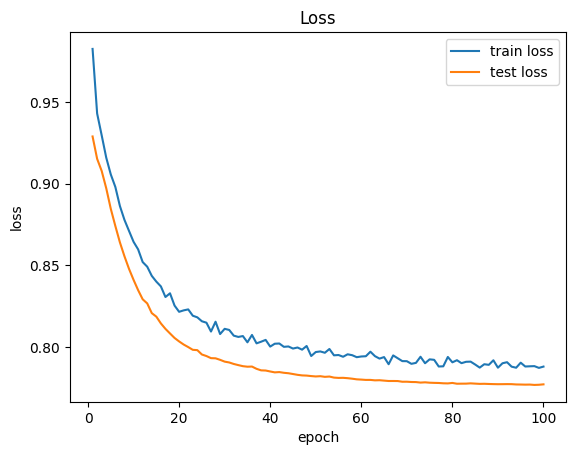

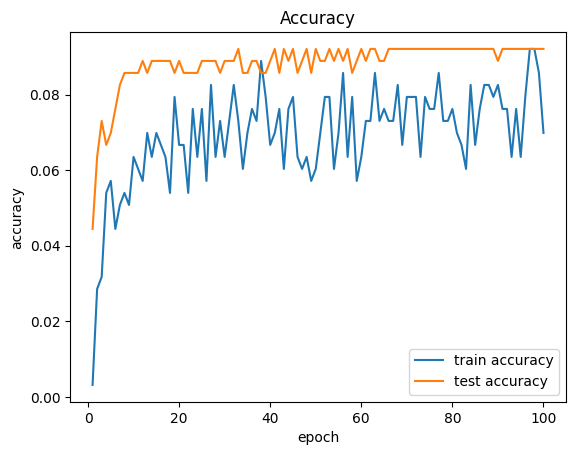

------------------------------


In [6]:
from utils import train_rnn, drawGraph
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder
import torch

batch_size = 5
epochs = 100
lr = 0.0001
weight_decay = 0

labels_encoder = LabelEncoder()
encoded_labels = labels_encoder.fit_transform(labels)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dataset = SequenceDataset(structure_embeddings, encoded_labels)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
LSTMLayer = nn.LSTM(768, 1536)
net = RNNModel(LSTMLayer, vocab_size=120)
net.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr, amsgrad=True, weight_decay=weight_decay)
train_loss, test_loss, train_acc, test_acc = train_rnn(net, loss_fn, optimizer, epochs, device, train_loader, test_loader)
drawGraph(train_loss, test_loss, train_acc, test_acc)
print("-"*30)